#**1. Configuración del Ambiente**

In [ ]:
# importacion de librerias necesarias y declaracion de variables globales
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

global df_ventas, df_ventas_limpio

#**2. Obtención y Tratamiento de Datos**

In [ ]:
# funciones para realizar las operaciones de limpieza a un dataframe
def obtencion_datos(fuente, separador):
  return pd.read_csv(fuente, sep = separador)

def formatear_fecha(df, campo_fecha, formato_fecha):
  df[campo_fecha] = pd.to_datetime(df[campo_fecha], format = formato_fecha)
  return df

def eliminar_repetidos(df):
  return df.drop_duplicates()

def eliminar_registros_prueba(df, consulta):
  return df.query(consulta)

def eliminar_nombres_nulos(df):
  return df.dropna()

def filtro_sin_ganancias(df):
  return df.query('total_ganancia > 0')

def actualizar_indice(df):
  return df.reset_index(drop = True)

In [ ]:
# importando el archivo fuente csv
df_ventas = obtencion_datos('reporte_ventas.csv', ',')

In [ ]:
# Informacion de datos antes de la limpieza
print('Información:')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('Registros de prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros nulos')
print(df_ventas.isnull().sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

In [ ]:
# funcion para limpiar los datos requeridos de un dataframe:
def limpieza_de_datos(fecha_1, fecha_2, formato_fecha, consulta_prueba):
  df = df_ventas.copy()
  df = formatear_fecha(df, fecha_1, formato_fecha)
  df = formatear_fecha(df, fecha_2, formato_fecha)
  df = eliminar_repetidos(df)
  df = eliminar_registros_prueba(df, consulta_prueba)
  df = eliminar_nombres_nulos(df)
  df = filtro_sin_ganancias(df)
  df.columns.name = 'Id'
  df = actualizar_indice(df)
  return df

In [ ]:
# almacenado de datos limpios en un nuevo dataframe:
df_ventas_limpio = limpieza_de_datos('fecha_pedido', 'fecha_envio', '%Y-%m-%d', 'nombre_cliente != "prueba"')

In [25]:
# guardado del dataframe limpio en un nuevo .csv, descomentar las 3 lineas siguientes:
#from google.colab import files
#df_ventas_limpio.to_csv("reporte_ventas_limpio.csv")
#files.download("reporte_ventas_limpio.csv")

In [ ]:
# verificando la informacion del dataframe limpio
print('Información:')
print(df_ventas_limpio.info())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros nulos')
print(df_ventas_limpio.isnull().sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

In [ ]:
# Funciones y variables útiles para visualizacion de graficos y otros
#  Funcion para hacer invisible el recuadro que encierra la grafica
def ocultar_recuadro(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

#  Quitar los guiones de los ticks de ambos ejes, y del eje x incluso el texto
def eliminar_guiones_texto_xy(ax, ejes):
  ax.tick_params(axis='both', which='both', length=0)
  if(ejes == 'x'):
    ax.set_xticks([])
  else:
    if(ejes == 'y'):
      ax.set_yticks([])
    else:
      if(ejes == 'xy'):
        ax.set_xticks([])
        ax.set_yticks([])

#  Ordenar descendentemente el top 7 por 'total_ganancias'
def ordenar_df_top_7(df, parametro, top):
  df = df.sort_values(by=parametro, ascending=False)
  df = df.head(top)
  df = df.sort_values(by=parametro, ascending=True)
  return df

color_t1 = '#05016e'
color_b1 = '#0077b6'
color_b2 = '#00b4d8'
color_b3 = '#90e0ef'
color_b4 = '#adb5bd'
color_b5 = '#dee2e6'

#3. Insights

## 1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

Id,total_venta,Change
año,,
2019,1052736.0,0.0
2020,1190541.0,13.0
2021,1535801.0,29.0
2022,1825928.0,19.0


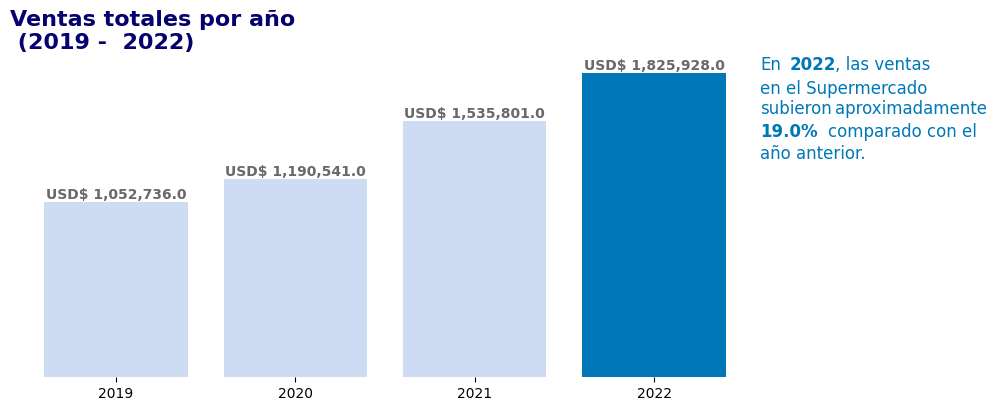

In [26]:
def pregunta_1():
  df_ventas_año = df_ventas_limpio.query('index == index')[['fecha_pedido', 'total_venta']]
  df_ventas_año['año'] = df_ventas_año.fecha_pedido.dt.year
  df_ventas_año.drop(columns = ['fecha_pedido'], inplace = True)
  df_ventas_año = df_ventas_año.groupby('año').sum('total_venta')

  df_ventas_año['Change'] = df_ventas_año['total_venta'].pct_change()*100
  df_ventas_año = df_ventas_año.round()
  df_ventas_año = df_ventas_año.fillna({'Change':0})

  x = df_ventas_año.iloc[3,1]

  fig, ax = plt.subplots(figsize=(7.5,3.2))
  ax = fig.add_axes([0, 0, 1, 1])
  colores = ['#CDDBF3', '#CDDBF3', "#CDDBF3", color_b1]
  ax.bar(['2019', '2020', '2021', '2022'], df_ventas_año['total_venta'], color=colores, width=0.8)
  ax.set_title('Ventas totales por año \n (2019 -  2022)', loc='left', fontsize=16, weight="bold", color=color_t1)

  qt = x

  texto1 = "En"
  texto2 = "2022"
  texto3 = ", las ventas"
  texto4 = "en el Supermercado subieron"
  texto5 = "aproximadamente"
  texto6 = qt
  texto7 = "comparado con el"
  texto8 = "año anterior."

  ax.text(1, 0.95, texto1, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True)
  ax.text(1.04, 0.95, texto2, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True, weight="bold")
  ax.text(1.1, 0.95, texto3, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True)
  ax.text(1, 0.81, texto4, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True)
  ax.text(1.1, 0.81, texto5, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True)
  ax.text(1, 0.74, f'{texto6:,}%', transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True, weight="bold")
  ax.text(1.09, 0.74, texto7, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True)
  ax.text(1, 0.67, texto8, transform=ax.transAxes, color=color_b1, fontsize=12, ha="left", va="bottom", wrap=True)

  plt.tick_params(left = False, right = False , labelleft = False ,
                  labelbottom = True, bottom = True)

  ocultar_recuadro(ax)

  for bar in ax.patches:
    valor = bar.get_height()
    qtd = valor
    ax.text(bar.get_x() + bar.get_width()/2.0, valor, f'USD$ {qtd:,}', color="#696969",fontsize=10, weight="bold", ha='center', va='bottom')
  return df_ventas_año

pregunta_1()

## 2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

¿Cuales son los 7 productos que mas ganancias mostraron durante todo el periodo?

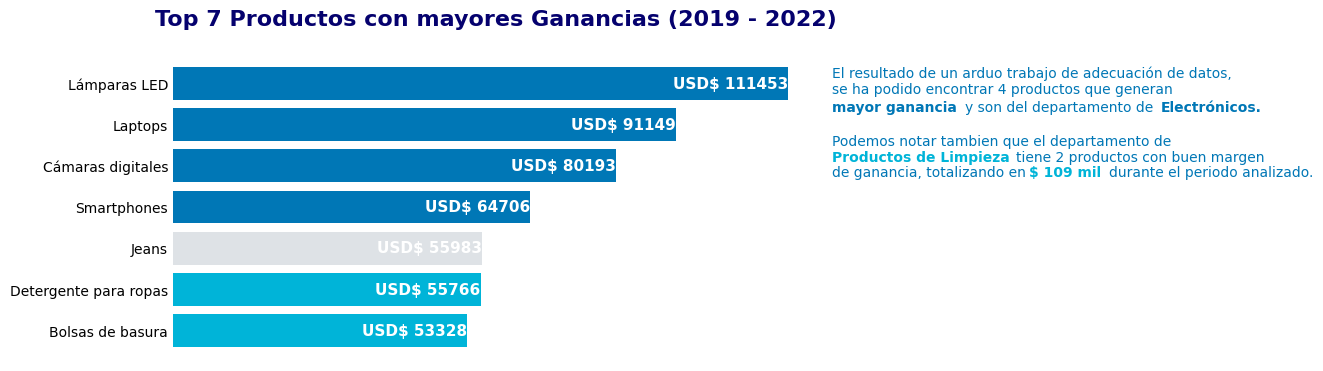

In [ ]:
def pregunta_2():
  df_top_ganancias = df_ventas_limpio.copy()
  df_top_ganancias = df_top_ganancias.query('index == index')[['tipo_producto', 'total_ganancia']]
  df_top_ganancias = df_top_ganancias.groupby('tipo_producto').agg({'total_ganancia': 'sum'})
  df_top_ganancias = ordenar_df_top_7(df_top_ganancias, 'total_ganancia', 7)

  # Configuración de la figura y el eje
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"width_ratios": [10, 2]})

  # Datos para el gráfico de barras horizontales
  ejeX = df_top_ganancias.index  # Índice de las primeras 7 filas
  ejeY = df_top_ganancias['total_ganancia']
  colores = [color_b2, color_b2, color_b5, color_b1, color_b1, color_b1, color_b1]
  ax1.barh(ejeX, ejeY, color=colores, align='center')

  # Agregar texto dentro de las barras
  for i,valor in enumerate(df_top_ganancias['total_ganancia'].round().astype(int)):
    qtd = valor
    ax1.text(valor,i, f'USD$ {qtd}',ha='right', va='center', color='white', fontsize=11, fontweight='bold')
    #ax1.bar_label(container,label_type='center', color="#F8F9F9", weight="bold")

  # Titulo del Grafico
  ax1.set_title('Top 7 Productos con mayores Ganancias (2019 - 2022)', color=color_t1, fontsize=16, weight="bold", pad=20)

  ocultar_recuadro(ax1)
  eliminar_guiones_texto_xy(ax1, 'x')

  # Dividir el texto y aplicar colores a cada fragmento
  text1 = "El resultado de un arduo trabajo de adecuación de datos, \nse ha podido encontrar 4 productos que generan "
  text2 = "mayor ganancia"
  text3 = "y son del departamento de "
  text4 = "Electrónicos."
  text5 = "Podemos notar tambien que el departamento de "
  text6 = "Productos de Limpieza"
  text7 = "tiene 2 productos con buen margen"
  text8 = "de ganancia, totalizando en"
  text9 = "$ 109 mil"
  text10 = "durante el periodo analizado."

  ax2.text(0.1,0.87,text1,color=color_b1 )
  ax2.text(0.1,0.81,text2,color=color_b1, weight="bold")
  ax2.text(1.13,0.81,text3,color=color_b1)
  ax2.text(2.65,0.81,text4,color=color_b1, weight="bold")
  ax2.text(0.1,0.7,text5,color=color_b1)
  ax2.text(0.1,0.65,text6,color=color_b2, weight="bold")
  ax2.text(1.53,0.65,text7,color=color_b1)
  ax2.text(0.1,0.60,text8,color=color_b1)
  ax2.text(1.63,0.60,text9,color=color_b2, weight="bold")
  ax2.text(2.25,0.60,text10,color=color_b1)

  ocultar_recuadro(ax2)
  eliminar_guiones_texto_xy(ax2, 'xy')

  # Ajustar el espaciado vertical
  plt.subplots_adjust(wspace=0)

  # Mostrar el gráfico
  plt.show()

pregunta_2()

## 3. Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

In [21]:
def pregunta_3():

  global df_ventas_limpio

  df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
  df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
  df_ventas_año_region = df_ventas_año_region.drop('fecha_pedido', axis=1)

  #Renombrar las columnas
  df_ventas_año_region = df_ventas_año_region.rename(columns={'region': 'Región'})
  df_ventas_año_region = df_ventas_año_region.rename(columns={'año': 'Año'})

# Generar la tabla cruzada
  tabla_cruzada = pd.crosstab(index=df_ventas_año_region['Año'],
                                   columns=df_ventas_año_region['Región'],
                                   values=df_ventas_año_region['total_venta'],
                                   aggfunc='sum')

# Organizar columnas de región en el orden deseado
  tabla_cruzada = tabla_cruzada[['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']]

  return tabla_cruzada

In [22]:
#Definir df_ventas_año_region como "pregunta_3()"
df_ventas_año_region = pregunta_3()

# Calcular el porcentaje acumulado de las regiones Sureste, Noreste y Centro-Oeste
# Calcular el porcentaje de ventas de Sureste, Noreste y Centro-Oeste para cada año
porcentaje_ventas = df_ventas_año_region[['Sureste', 'Noreste', 'Centro-Oeste']].div(df_ventas_año_region.sum(axis=1), axis=0) * 100

# Calcular el porcentaje acumulado para cada año
porcentaje_acumulado = porcentaje_ventas.cumsum(axis=1)

df_ventas_año_region

Región,Sureste,Noreste,Centro-Oeste,Norte,Sur
Año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


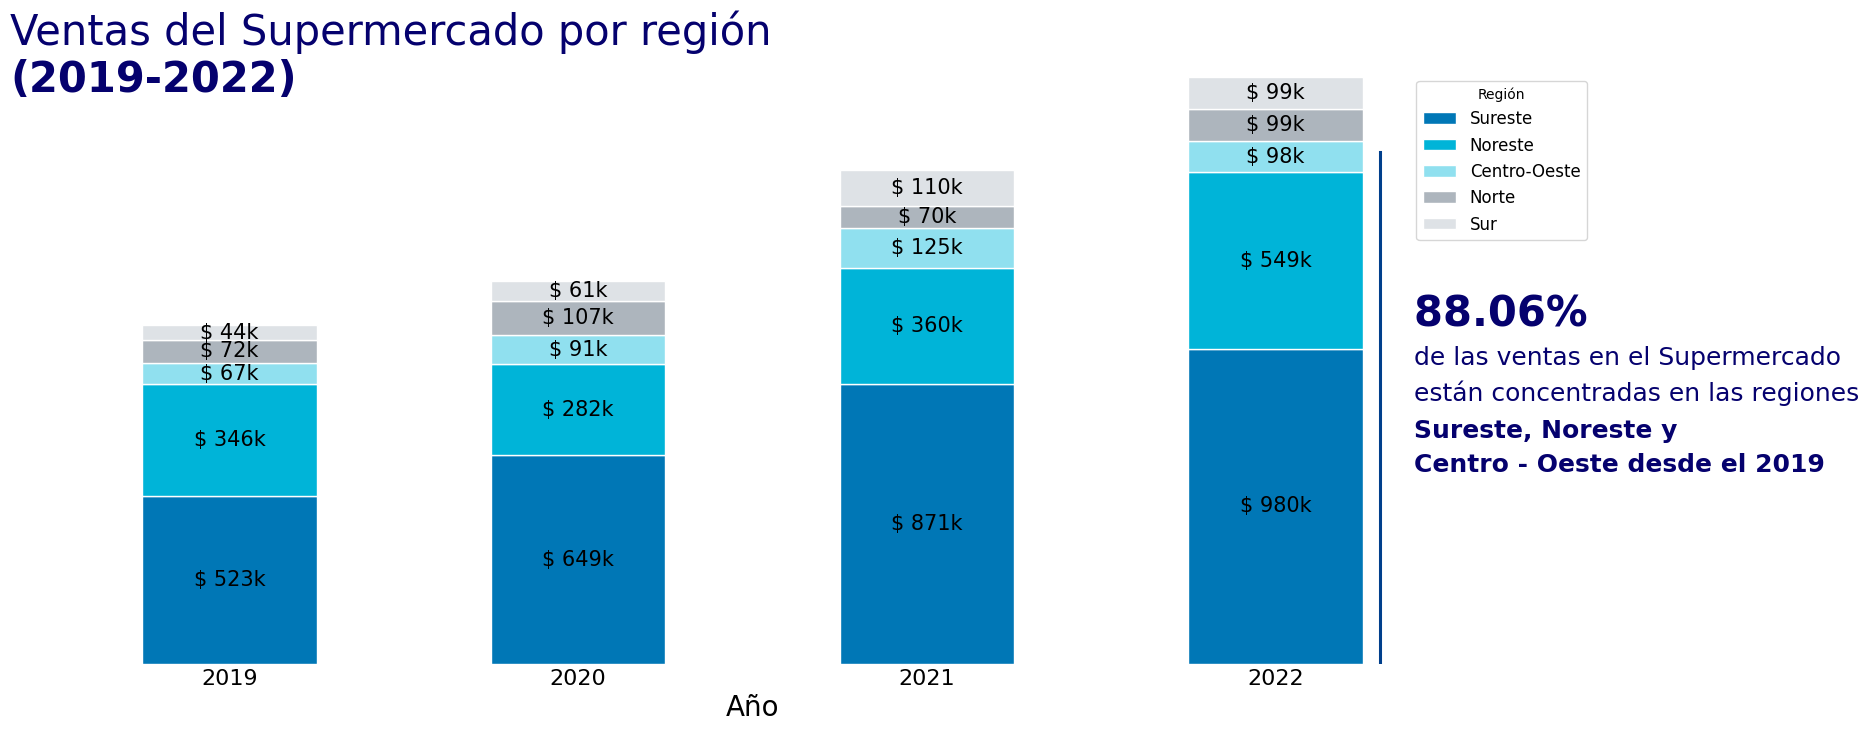

In [23]:
# Definir los colores
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']
ax = df_ventas_año_region.plot(kind='bar', stacked=True, color=colores, figsize=(18, 8))

# Inicio Configuración adicional gráfico

eliminar_guiones_texto_xy(ax, 'y')
ocultar_recuadro(ax)

#Colocar los numeros del año de manera horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=16)
ax.set_xlabel('Año', fontsize=16)

#Separación de borde blanco entre cada "cuadro"
for patch in ax.patches:
    patch.set_edgecolor('white')

# Calcular el porcentaje acumulado y agregar descripción y línea vertical
promedio_final = porcentaje_acumulado.mean(axis=0).iloc[-1]

#Texto de descripción
desc1 = f"{promedio_final:.2f}% \n"
desc2 = (
    "de las ventas en el Supermercado \n"
    "están concentradas en las regiones"
)

desc3 = (
    "Sureste, Noreste y \n"
    "Centro - Oeste desde el 2019"
)

plt.text(0.88, 0.51, desc1, transform=plt.gcf().transFigure, fontsize=30, ha='left',
         va='center', linespacing=1.5, color='#05016e', bbox=dict(boxstyle="round,pad=0.3", edgecolor="White", facecolor="white"),
         fontdict={'weight': 'bold'})
plt.text(0.88, 0.47, desc2, transform=plt.gcf().transFigure, fontsize=18, ha='left',
         va='center', linespacing=1.5, color='#05016e', bbox=dict(boxstyle="round,pad=0.3", edgecolor="White", facecolor="white"))
plt.text(0.88, 0.38, desc3, transform=plt.gcf().transFigure, fontsize=18, ha='left',
         va='center', linespacing=1.5, color='#05016e', bbox=dict(boxstyle="round,pad=0.3", edgecolor="White", facecolor="white"),
         fontdict={'weight': 'bold'})

# Agregar línea vertical
ax.axvline(x=3.3, ymin=0, ymax=0.83, color='#003f8c', linestyle='-', linewidth=2.2)

# Ajuste de la leyenda
legend = ax.legend(fontsize=12, bbox_to_anchor=(0.97, 0.96), title='Región')

#Título
title1=("Ventas del Supermercado por región")
title2=("(2019-2022)")

plt.text(0.1, 0.90, title1, transform=plt.gcf().transFigure, fontsize=30, ha='left',
         va='center', linespacing=1.5, color='#05016e')
plt.text(0.1, 0.84, title2, transform=plt.gcf().transFigure, fontsize=30, ha='left',
         va='center', linespacing=1.5, color='#05016e', fontdict={'weight': 'bold'})

# Aumentar el tamaño del texto "Año" en el eje x
ax.set_xlabel('Año', fontsize=20)

for container in ax.containers:
  labels = [f"$ {valor/1000:.0f}k" for valor in container.datavalues]
  ax.bar_label(container, label_type='center', labels=labels, fontsize=15)


## 4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?


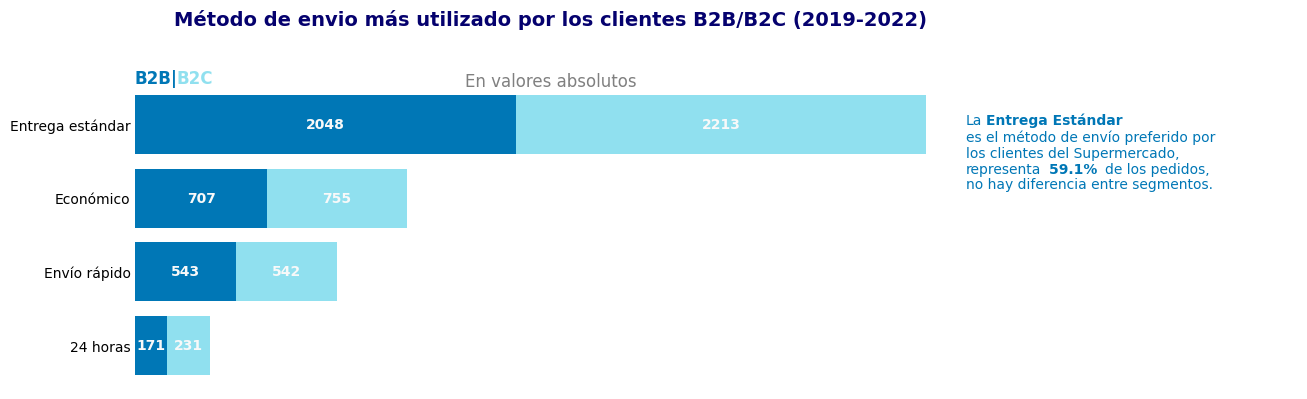

In [72]:
def pregunta_4():
  #Nueva df que contiene sólo las columnas modo_envío y segmento_cliente
  df_modo_envio = df_ventas_limpio [['modo_envio', 'segmento_cliente']].copy()

  # Calcular el porcentaje de 'segmento_cliente' cuando 'modo_envio' es igual al tipo deseado
  porcentaje_entrega_estandar = round((df_modo_envio['modo_envio'] == 'Entrega estándar').mean() * 100, 2)

  #generar tabla cruzada
  tabla_cruzada=pd.crosstab(index = df_modo_envio['modo_envio'], columns = df_modo_envio['segmento_cliente']).sort_values("B2B")

  # Configuración de la figura y el eje
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), gridspec_kw={"width_ratios": [10, 4]})


  # Titulo del Grafico
  ax1.set_title('Método de envio más utilizado por los clientes B2B/B2C (2019-2022)', color=color_t1, fontsize=14, weight="bold", pad=40)

  # Agregar un subtítulo
  subtitle=("En valores absolutos")
  ax1.annotate(subtitle, xy=(0.5, 1), xycoords='axes fraction', ha='center', va='center', fontsize=12, color='gray')

  # Agregar subtitulo B2B/B2C en la parte superior izquierda
  subtitle_b2b = 'B2B|'
  subtitle_b2c = 'B2C'
  ax1.text(-0.065, 0.37, subtitle_b2b, transform=ax.transAxes, fontsize=12, color=color_b1, weight='bold')
  ax1.text(-0.035, 0.37, subtitle_b2c, transform=ax.transAxes, fontsize=12, color=color_b3, weight='bold')

  ejeX= tabla_cruzada.index
  ejeY1= tabla_cruzada["B2B"]
  ejeY2= tabla_cruzada["B2C"]
  ax1.barh(ejeX, ejeY1, color=color_b1)
  ax1.barh(ejeX, ejeY2, left=ejeY1, color=color_b3)

  for container in ax1.containers:
    ax1.bar_label(container,label_type='center', color="#F8F9F9", weight="bold")

  # Dividir el texto y aplicar colores a cada fragmento
  text1 = "La"
  text2 = "Entrega Estándar"
  text3 = "es el método de envío preferido por \nlos clientes del Supermercado, \nrepresenta"
  text4 = f"{porcentaje_entrega_estandar}% "
  text5 = "de los pedidos,"
  text6 = "no hay diferencia entre segmentos."

  ax2.text(0, 0.86,text1,color=color_b1 )
  ax2.text(0.06, 0.86,text2,color=color_b1, weight="bold")
  ax2.text(0, 0.70,text3,color=color_b1)
  ax2.text(0.25, 0.70,text4,color=color_b1, weight="bold")
  ax2.text(0.42, 0.70,text5,color=color_b1)
  ax2.text(0, 0.65,text6,color=color_b1)

  eliminar_guiones_texto_xy(ax1, 'x')
  ocultar_recuadro(ax1)
  eliminar_guiones_texto_xy(ax2, 'xy')
  ocultar_recuadro(ax2)

  # Ajustar el espaciado vertical
  plt.subplots_adjust(wspace=0)

  plt.show()

pregunta_4()

## 5. ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

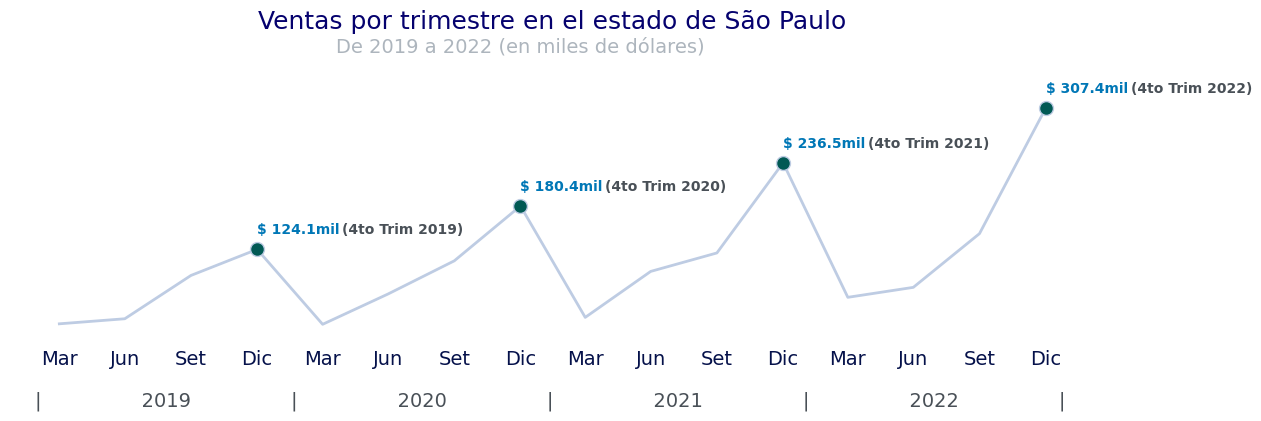

In [ ]:
def pregunta_5():
  df_ventas_sp = df_ventas_limpio.copy()
  df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'][['fecha_pedido', 'total_venta']]
  #fecha_pedido debe ser un indice ya que la función resample así lo requiere
  df_ventas_sp.set_index('fecha_pedido', inplace=True)
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
  df_ventas_sp['total_venta']=round(df_ventas_sp['total_venta']/1e3,2)
  df_ventas_sp = df_ventas_sp.reset_index()

  fix,ax=plt.subplots(figsize=(14,4))
  marcar_puntos= [True if mes == 12 else False for mes in df_ventas_sp ['fecha_pedido'].dt.month]

  #puntos_a_marcar = [True if mes.month == 12 else False for mes in pd.to_datetime(df_ventas_sp['fecha_pedido'])]
  ax.plot(df_ventas_sp['fecha_pedido'], df_ventas_sp['total_venta'], lw=2, color='#BECCE3', marker='o',
  markersize=10, markerfacecolor='#015954', markevery=marcar_puntos)

  #personalizando el gráfico
  ax.set_title('Ventas por trimestre en el estado de São Paulo', fontsize=18, color=color_t1, loc='center')
  ax.text(0.3, 0.95, 'De 2019 a 2022 (en miles de dólares)', transform=ax.transAxes, color=color_b4, fontsize=14)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_yticks([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor='#05114a')
  ax.tick_params(axis='both', which='both', length=0)
  ax.yaxis.grid(False)
  ax.xaxis.grid(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  plt.ylim(0, 400)

  #Definiendo el intervalo en trimestres y colocando los nombres de los meses en los labels
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  x_labels = ['Mar', 'Jun', 'Set', 'Dic'] * 4
  ax.set_xticks(df_ventas_sp.fecha_pedido)
  ax.set_xticklabels(x_labels, ha='center')

  # Ajustando el eje x
  texto = [16 * " " + str(i) + 16 * " " for i in range(2019, 2023)]
  ax.text(ax.get_xbound()[0] + 35, -80,f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color='#495057')

  # Destacando valores de 4to trimestre
  año = 0
  for i in range(3, len(df_ventas_sp["total_venta"]),4):
    ax.text(x=ax.get_xticks()[i], y=df_ventas_sp['total_venta'][i] + 20, s = f"$ {df_ventas_sp['total_venta'][i].round(1)}mil",color="#0077b6", weight="bold", fontsize=10)
    ax.text(x=ax.get_xticks()[i] + 118, y=df_ventas_sp['total_venta'][i] + 20, s = f"(4to Trim {2019+año})",color="#495057", weight="bold", fontsize=10)
    año+=1
  return ax.get_figure()

fig = pregunta_5()


# 6. ¿Cuáles son las 7 Ciudades donde se generan mayores ganancias?

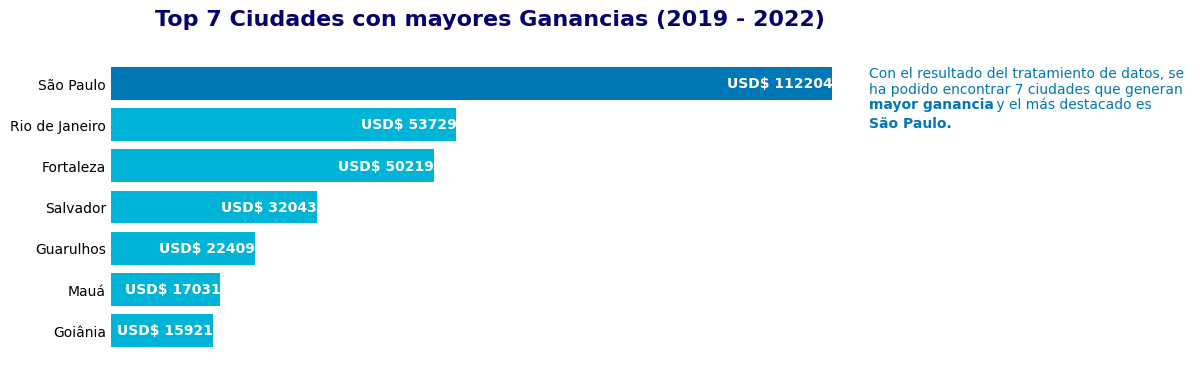

In [ ]:
def top_ciudades():
  df_top_ciu = df_ventas_limpio.copy()
  df_top_ciu = df_top_ciu.query('index == index')[['ciudad', 'total_ganancia']]
  df_top_ciu = df_top_ciu.groupby("ciudad").agg({'total_ganancia': 'sum'})

  #print(df_top_ciu)
  df_top_ciu = ordenar_df_top_7(df_top_ciu, 'total_ganancia', 7)

  # Configuración de la figura y el eje
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4), gridspec_kw={"width_ratios": [16, 2]})

  # Datos para el gráfico de barras horizontales
  ejeX = df_top_ciu.index  # Índice de las primeras 7 filas
  ejeY = df_top_ciu['total_ganancia']
  colores = [color_b2, color_b2, color_b2, color_b2, color_b2, color_b2, color_b1]
  ax1.barh(ejeX, ejeY, color=colores, align='center')

  # Agregar texto dentro de las barras
  for i,valor in enumerate(df_top_ciu['total_ganancia'].round().astype(int)):
    qtd = valor
    ax1.text(valor,i, f'USD$ {qtd}',ha='right', va='center', color='white', fontsize=10, fontweight='bold')

  # Titulo del Grafico
  ax1.set_title('Top 7 Ciudades con mayores Ganancias (2019 - 2022)', color=color_t1, fontsize=16, weight="bold", pad="20")

  # Dividir el texto y aplicar colores a cada fragmento
  text1 = "Con el resultado del tratamiento de datos, se \nha podido encontrar 7 ciudades que generan "
  text2 = "mayor ganancia"
  text3 = " y el más destacado es"
  text4 = "São Paulo."

  ax2.text(0,0.87,text1,color=color_b1 )
  ax2.text(0,0.82,text2,color=color_b1, weight="bold")
  ax2.text(1.3,0.82,text3,color=color_b1)
  ax2.text(0,0.76,text4,color=color_b1, weight="bold")

  ocultar_recuadro(ax1)
  eliminar_guiones_texto_xy(ax1, 'x')
  ocultar_recuadro(ax2)
  eliminar_guiones_texto_xy(ax2, 'xy')

  # Ajustar el espaciado vertical
  plt.subplots_adjust(wspace=0)

  # Mostrar el gráfico
  plt.show()

top_ciudades()